## **Thompson Sampling**
`Thompson sampling` is an algorithm for online decision prob- lems where actions are taken sequentially in a manner that must balance between exploiting what is known to maxi- mize immediate performance and investing to accumulate new information that may improve future performance.

In [14]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
''' genrating the random data '''
data = {}
data['B1'] = [random.randint(0,1) for x in range(200)]
data['B2'] = [random.randint(0,1) for x in range(200)]
data['B3'] = [random.randint(0,1) for x in range(200)]
data['B4'] = [random.randint(0,1) for x in range(200)]
data['B5'] = [random.randint(0,1) for x in range(200)]
data = pd.DataFrame(data)

In [3]:
data.head()

,B1,B2,B3,B4,B5
0,1,1,1,0,1
1,0,1,1,0,0
2,0,1,0,0,0
3,0,1,0,1,0
4,0,1,0,1,0


In [4]:
''' initializing some parameters '''
observations = 200
machines = 5

machine_selected = []

#### **We will now initialize 3 variables**

- one to store the rewards or 1’s received by each Slot Machine/Bandit that was selected by the Thompson Sampling algorithm,
- one to store the penalties or 0’s received by each Slot Machine/Bandit that was selected by the Thompson Sampling algorithm, and,
- a variable to store the total number of rewards obtained using the

In [6]:
rewards = [0] * machines
penalties = [0] * machines
total_reward = 0

#### **Now let’s begin Thompson Sampling!**

In [7]:
for n in range(0, observations):
    bandit = 0
    beta_max = 0
    
    for i in range(0, machines):
        beta_d = random.betavariate(rewards[i] + 1, penalties[i] + 1)
        if beta_d > beta_max:
            beta_max = beta_d
            bandit = i
    machine_selected.append(bandit)
    reward = data.values[n, bandit]
    if reward == 1: rewards[bandit] = rewards[bandit] + 1
    else:
        penalties[bandit] = penalties[bandit] + 1
        total_reward = total_reward + reward

#### Now, let's visualize the results 

In [8]:
print("\n\nRewards By Machine = ", rewards)
print("\nTotal Rewards = ", total_reward)
print("\nMachine Selected At Each Round By Thompson Sampling : \n", machine_selected)



Rewards By Machine =  [15, 14, 8, 29, 36]

Total Rewards =  0

Machine Selected At Each Round By Thompson Sampling : 
 [3, 0, 1, 4, 1, 3, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 3, 0, 4, 4, 1, 0, 0, 1, 1, 4, 3, 1, 1, 4, 4, 4, 3, 1, 3, 1, 4, 1, 4, 4, 1, 1, 4, 4, 3, 2, 1, 1, 0, 1, 1, 4, 3, 1, 1, 3, 1, 2, 2, 1, 4, 4, 0, 1, 3, 2, 3, 4, 1, 3, 4, 4, 4, 4, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 0, 0, 3, 3, 1, 3, 3, 3, 4, 4, 3, 0, 4, 4, 0, 3, 0, 4, 0, 3, 0, 4, 3, 0, 4, 2, 2, 4, 0, 3, 2, 3, 4, 0, 4, 1, 0, 4, 4, 4, 0, 4, 0, 0, 4, 0, 3, 4, 0, 4, 4, 2, 4, 0, 4, 4, 2, 4, 3, 0, 4, 4, 4, 4, 4, 3, 4, 3, 2, 2, 4, 2, 4, 3, 4, 4, 4, 3, 1, 4, 4, 4, 4, 1, 2, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 0, 3, 2, 0, 4, 4, 3, 3, 3, 4, 4, 2, 4, 0]


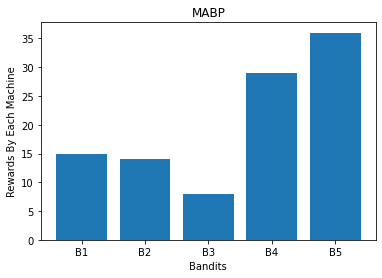

In [11]:
'''Rewards By Each Machine'''

#Visualizing the rewards of each machine
plt.bar(['B1','B2','B3','B4','B5'],rewards)
plt.title('MABP')
plt.xlabel('Bandits')
plt.ylabel('Rewards By Each Machine')
plt.show()

In [13]:
'''Number Of Times Each Machine Was Selected'''

print("\n\nNumber Of Times Each Machine Was Selected By The Thompson Sampling Algorithm : \n",
      dict(Counter(machine_selected)))



Number Of Times Each Machine Was Selected By The Thompson Sampling Algorithm : 
 {3: 51, 0: 30, 1: 32, 4: 67, 2: 20}


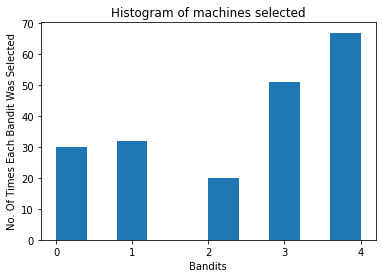

In [15]:
'''Visualizing the Number Of Times Each Machine Was Selected'''

plt.hist(machine_selected)
plt.title('Histogram of machines selected')
plt.xlabel('Bandits')
plt.xticks(range(0, 5))
plt.ylabel('No. Of Times Each Bandit Was Selected')
plt.show()